In [44]:
from IPython.display import HTML, display
from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import print_board, play_game
from tic_tac_toe.RandomPlayer import RandomPlayer

board = Board()
player1 = RandomPlayer()
player2 = RandomPlayer()

result = play_game(board, player1, player2)
print_board(board)

if result == GameResult.CROSS_WIN:
    print("Cross won")
elif result == GameResult.NAUGHT_WIN:
    print("Naught won")
else:
    print("Draw")

x,,o
o,x,o
,x,x


Cross won


In [45]:
from tic_tac_toe.Player import Player

def battle(player1: Player, player2: Player, num_games: int = 100000):
    board = Board()
    draw_count = 0
    cross_count = 0
    naught_count = 0
    for _ in range(num_games):
        result = play_game(board, player1, player2)
        if result == GameResult.CROSS_WIN:
            cross_count += 1
        elif result == GameResult.NAUGHT_WIN:
            naught_count += 1
        else:
            draw_count += 1

    print("After {} game we have draws: {}, Player 1 wins: {}, and Player 2 wins: {}.".format(num_games, draw_count,
                                                                                         cross_count, naught_count))

    print("Which gives percentages of draws: {:.2%}, Player 1 wins: {:.2%}, and Player 2 wins:  {:.2%}".format(
        draw_count / num_games, cross_count / num_games, naught_count / num_games))

In [46]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import battle

def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'o-', label='Draw')
    plt.plot(count, p1_wins, 'p-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'v-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

After 100 game we have draws: 5, Player 1 wins: 95, and Player 2 wins: 0.
Which gives percentages of draws: 5.00%, Player 1 wins: 95.00%, and Player 2 wins:  0.00%


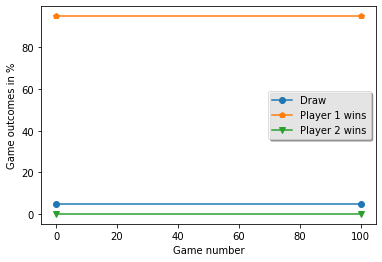

In [47]:
player1 = MinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2, 1)

After 100 game we have draws: 0, Player 1 wins: 100, and Player 2 wins: 0.
Which gives percentages of draws: 0.00%, Player 1 wins: 100.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 7, Player 1 wins: 93, and Player 2 wins: 0.
Which gives percentages of draws: 7.00%, Player 1 wins: 93.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 0, Player 1 wins: 100, and Player 2 wins: 0.
Which gives percentages of draws: 0.00%, Player 1 wins: 100.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 2, Player 1 wins: 98, and Player 2 wins: 0.
Which gives percentages of draws: 2.00%, Player 1 wins: 98.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 7, Player 1 wins: 93, and Player 2 wins: 0.
Which gives percentages of draws: 7.00%, Player 1 wins: 93.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 8, Player 1 wins: 92, and Player 2 wins: 0.
Which gives percentages of draws: 8.00%, Player 1 wins: 92.00%, and Player 2 wins:  0.00%
After 100 ga

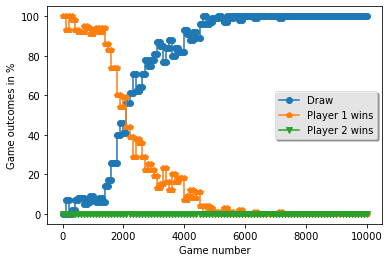

In [31]:
player1 = RndMinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2, 100)

After 100 game we have draws: 3, Player 1 wins: 97, and Player 2 wins: 0.
Which gives percentages of draws: 3.00%, Player 1 wins: 97.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 76, Player 1 wins: 24, and Player 2 wins: 0.
Which gives percentages of draws: 76.00%, Player 1 wins: 24.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 

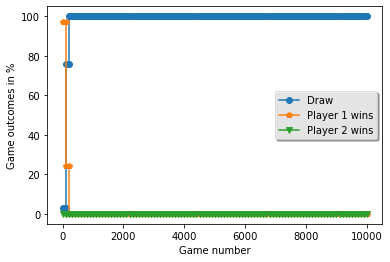

In [32]:
player1 = AlphaBetaAgent()
player2 = TQPlayer()
eval_players(player1, player2, 100)
AlphaBetaAgent()

After 100 game we have draws: 3, Player 1 wins: 97, and Player 2 wins: 0.
Which gives percentages of draws: 3.00%, Player 1 wins: 97.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 76, Player 1 wins: 24, and Player 2 wins: 0.
Which gives percentages of draws: 76.00%, Player 1 wins: 24.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 

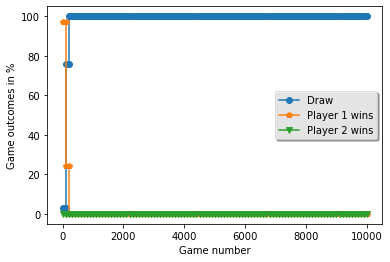

In [33]:
player1 = AlphaBetaAgent()
player2 = TQPlayer(q_init=1.0)
eval_players(player1, player2, 100)


After 100 game we have draws: 73, Player 1 wins: 27, and Player 2 wins: 0.
Which gives percentages of draws: 73.00%, Player 1 wins: 27.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
Afte

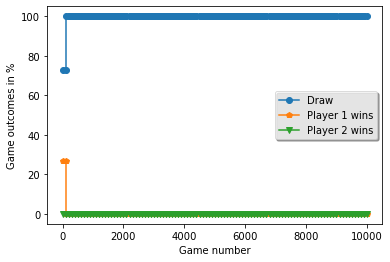

In [34]:
player1 = AlphaBetaAgent()
player2 = TQPlayer(q_init=0.001)
eval_players(player1, player2, 100)

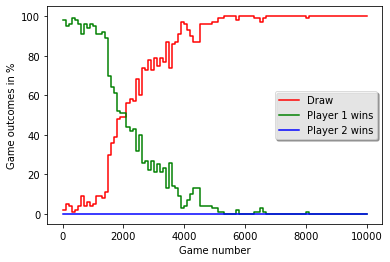

In [5]:
player1 = RndMinMaxAgent()
player2 = TQPlayer(q_init=1.0)
eval_players(player1, player2, 100)

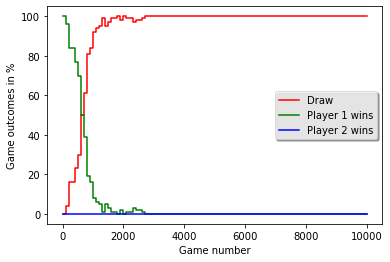

In [6]:
player1 = RndMinMaxAgent()
player2 = TQPlayer(q_init=0.001)
eval_players(player1, player2, 100)

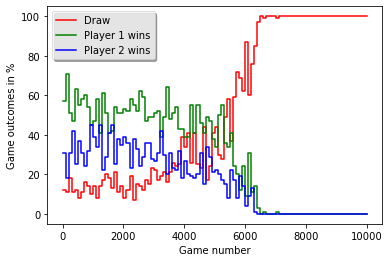

In [7]:
player1 = TQPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 100)

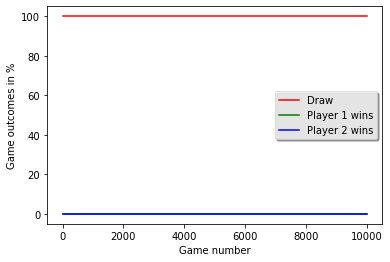

In [7]:
player1 = RndMinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2, 100)

In [48]:
player1 = RandomPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 500)

After 100 game we have draws: 4, Player 1 wins: 56, and Player 2 wins: 40.
Which gives percentages of draws: 4.00%, Player 1 wins: 56.00%, and Player 2 wins:  40.00%
After 100 game we have draws: 13, Player 1 wins: 39, and Player 2 wins: 48.
Which gives percentages of draws: 13.00%, Player 1 wins: 39.00%, and Player 2 wins:  48.00%
After 100 game we have draws: 5, Player 1 wins: 38, and Player 2 wins: 57.
Which gives percentages of draws: 5.00%, Player 1 wins: 38.00%, and Player 2 wins:  57.00%
After 100 game we have draws: 9, Player 1 wins: 33, and Player 2 wins: 58.
Which gives percentages of draws: 9.00%, Player 1 wins: 33.00%, and Player 2 wins:  58.00%
After 100 game we have draws: 8, Player 1 wins: 36, and Player 2 wins: 56.
Which gives percentages of draws: 8.00%, Player 1 wins: 36.00%, and Player 2 wins:  56.00%
After 100 game we have draws: 11, Player 1 wins: 39, and Player 2 wins: 50.
Which gives percentages of draws: 11.00%, Player 1 wins: 39.00%, and Player 2 wins:  50.00%


After 100 game we have draws: 6, Player 1 wins: 77, and Player 2 wins: 17.
Which gives percentages of draws: 6.00%, Player 1 wins: 77.00%, and Player 2 wins:  17.00%
After 100 game we have draws: 8, Player 1 wins: 79, and Player 2 wins: 13.
Which gives percentages of draws: 8.00%, Player 1 wins: 79.00%, and Player 2 wins:  13.00%
After 100 game we have draws: 12, Player 1 wins: 70, and Player 2 wins: 18.
Which gives percentages of draws: 12.00%, Player 1 wins: 70.00%, and Player 2 wins:  18.00%
After 100 game we have draws: 5, Player 1 wins: 83, and Player 2 wins: 12.
Which gives percentages of draws: 5.00%, Player 1 wins: 83.00%, and Player 2 wins:  12.00%
After 100 game we have draws: 6, Player 1 wins: 70, and Player 2 wins: 24.
Which gives percentages of draws: 6.00%, Player 1 wins: 70.00%, and Player 2 wins:  24.00%
After 100 game we have draws: 5, Player 1 wins: 87, and Player 2 wins: 8.
Which gives percentages of draws: 5.00%, Player 1 wins: 87.00%, and Player 2 wins:  8.00%
Afte

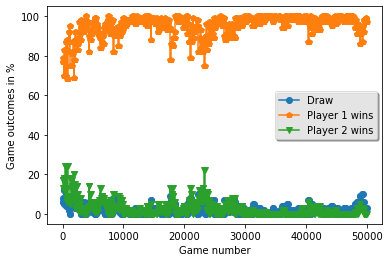

In [36]:
player1 = TQPlayer()
player2 = RandomPlayer() 
eval_players(player1, player2, 500)

After 100 game we have draws: 3, Player 1 wins: 97, and Player 2 wins: 0.
Which gives percentages of draws: 3.00%, Player 1 wins: 97.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 76, Player 1 wins: 24, and Player 2 wins: 0.
Which gives percentages of draws: 76.00%, Player 1 wins: 24.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 

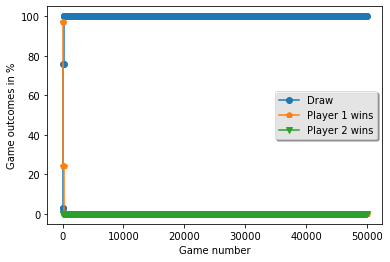

In [38]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent
player1 = AlphaBetaAgent()
player2 = TQPlayer()
eval_players(player1, player2, 500)

After 100 game we have draws: 25, Player 1 wins: 0, and Player 2 wins: 75.
Which gives percentages of draws: 25.00%, Player 1 wins: 0.00%, and Player 2 wins:  75.00%
After 100 game we have draws: 16, Player 1 wins: 0, and Player 2 wins: 84.
Which gives percentages of draws: 16.00%, Player 1 wins: 0.00%, and Player 2 wins:  84.00%
After 100 game we have draws: 20, Player 1 wins: 0, and Player 2 wins: 80.
Which gives percentages of draws: 20.00%, Player 1 wins: 0.00%, and Player 2 wins:  80.00%
After 100 game we have draws: 42, Player 1 wins: 0, and Player 2 wins: 58.
Which gives percentages of draws: 42.00%, Player 1 wins: 0.00%, and Player 2 wins:  58.00%
After 100 game we have draws: 49, Player 1 wins: 0, and Player 2 wins: 51.
Which gives percentages of draws: 49.00%, Player 1 wins: 0.00%, and Player 2 wins:  51.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
Afte

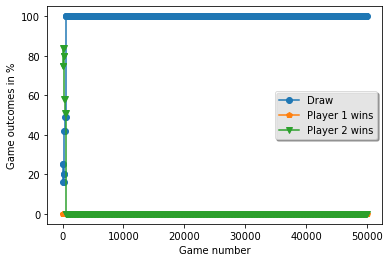

In [39]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent
player1 = AlphaBetaAgent()
player2 = TQPlayer()
eval_players(player2, player1, 500)

In [10]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent
battle(AlphaBetaAgent(), RndMinMaxAgent())

After 100000 game we have draws: 100000, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%


(0, 0, 100000)

In [11]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent
battle(AlphaBetaAgent(), TQPlayer())

After 100000 game we have draws: 99879, Player 1 wins: 121, and Player 2 wins: 0.
Which gives percentages of draws: 99.88%, Player 1 wins: 0.12%, and Player 2 wins:  0.00%


(121, 0, 99879)

In [40]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent
battle(TQPlayer(), AlphaBetaAgent())

After 100000 game we have draws: 99652, Player 1 wins: 0, and Player 2 wins: 348.
Which gives percentages of draws: 99.65%, Player 1 wins: 0.00%, and Player 2 wins:  0.35%


(0, 348, 99652)

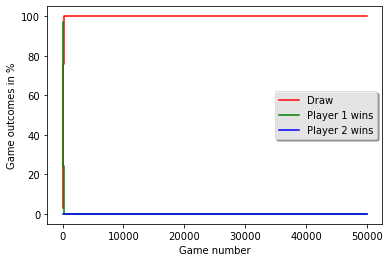

In [14]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent
player1 = AlphaBetaAgent()
player2 = TQPlayer()
eval_players(player1, player2, 500)

After 100 game we have draws: 3, Player 1 wins: 97, and Player 2 wins: 0.
Which gives percentages of draws: 3.00%, Player 1 wins: 97.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 76, Player 1 wins: 24, and Player 2 wins: 0.
Which gives percentages of draws: 76.00%, Player 1 wins: 24.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 100 game we have draws: 100, Player 1 wins: 0, and Player 2 wins: 0.
Which gives percentages of draws: 100.00%, Player 1 wins: 0.00%, and Player 2 wins:  0.00%
After 

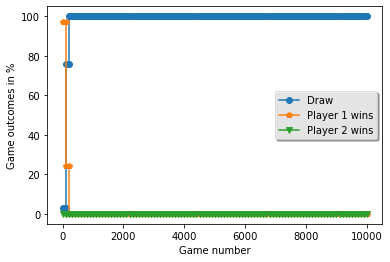

In [43]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent
player1 = AlphaBetaAgent()
player2 = TQPlayer()
eval_players(player1, player2, 100)

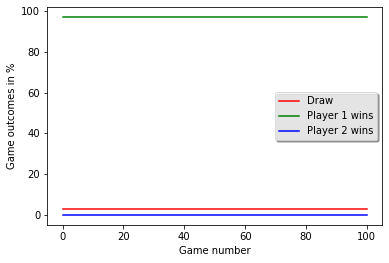

In [8]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent
player1 = AlphaBetaAgent()
player2 = TQPlayer()
eval_players(player1, player2, 1)

In [26]:
from tic_tac_toe.AlphaBeta import AlphaBetaAgent

In [41]:
battle(TQPlayer(), RandomPlayer())

After 100000 game we have draws: 1668, Player 1 wins: 96915, and Player 2 wins: 1417.
Which gives percentages of draws: 1.67%, Player 1 wins: 96.91%, and Player 2 wins:  1.42%


(96915, 1417, 1668)

In [42]:
battle(RandomPlayer(),TQPlayer())

After 100000 game we have draws: 8987, Player 1 wins: 2813, and Player 2 wins: 88200.
Which gives percentages of draws: 8.99%, Player 1 wins: 2.81%, and Player 2 wins:  88.20%


(2813, 88200, 8987)